# 采用cnn模型实现对猫狗图片的二分类

## 一. 数据加载
通过ImageDataGenerator进行图像的增强与预处理（将图片尺寸转化为50*50，设置分类模式为二分类），将数据归一化，并载入图片。

In [2]:
# 加载数据
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow_from_directory('./dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


## 二.建立CNN模型
1. 第一层卷积层共有32个filter，每一个filter的大小为3*3，且步长为1.激活函数采用relu
2. 第一层池化层采用最大池化，池化尺寸为2*2，步长为1
3. 第二层卷积层共有32个filter，每一个filter的大小为3*3，且步长为1.激活函数采用relu
4. 第二层池化层采用最大池化，池化尺寸为2*2，步长为1
5. 对处理结果进行展开
5. 建立mlp模型，采用128个神经元，激活函数为relu，输出一个型号，激活函数为sigmoid

In [4]:
# 建立cnn模型
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential()
# CONV
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
# MaxPool
model.add(MaxPool2D(pool_size=(2,2)))
# CONV
model.add(Conv2D(32,(3,3),activation='relu'))
# MaxPool
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layer
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

## 三.模型求解参数配置与训练
1. 采用adam作为模型的优化器
2. 采用binary_crossentropy作为模型的损失函数
3. 采用metrics=['accuracy']提供模型训练时的准确率
4. 采用30次迭代训练模型

In [6]:
# 配置模型
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
# 训练模型
model.fit_generator(train_set,epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
250/250 [==============================] - 27s 108ms/step - loss: 0.6717 - accuracy: 0.5757
Epoch 2/30
250/250 [==============================] - 25s 100ms/step - loss: 0.5724 - accuracy: 0.7072
Epoch 3/30
250/250 [==============================] - 26s 103ms/step - loss: 0.5164 - accuracy: 0.7446
Epoch 4/30
250/250 [==============================] - 27s 107ms/step - loss: 0.4714 - accuracy: 0.7731
Epoch 5/30
250/250 [==============================] - 27s 107ms/step - loss: 0.4233 - accuracy: 0.8058
Epoch 6/30
250/250 [==============================] - 27s 107ms/step - loss: 0.3742 - accuracy: 0.8359
Epoch 7/30
250/250 [==============================] - 29s 115ms/step - loss: 0.3175 - accuracy: 0.8619
Epoch 8/30
250/250 [==============================] - 28s 113ms/step - loss: 0.2560 - accuracy: 0.8970
Epoch 9/30
250/250 [==============================] - 27s 107ms/step - loss: 0.1965 - accuracy: 0.9224
Epoch 10/30
250/250 [====

## 四. 计算模型准确率
对于训练集，模型预测准确率为1.0。
对于测试集，模型预测准确率为0.75。

In [9]:
# 计算模型准确率
accuracy_train = model.evaluate_generator(train_set)
print(accuracy_train)

[0.0002077360695693642, 1.0]


In [10]:
test_set = train_datagen.flow_from_directory('./dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')
accuracy_train = model.evaluate_generator(test_set)
print(accuracy_train)

Found 2000 images belonging to 2 classes.
[0.6630091667175293, 0.7590000033378601]


In [11]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

## 五. 模型中间层可视化

In [14]:
for index in range(7):
    layer = model.get_layer(index=index)
    print(layer)

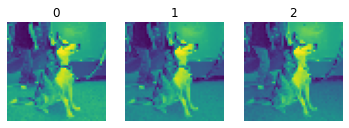

[[1]]


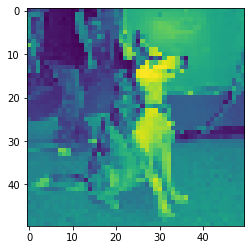

In [145]:
# 加载单张图片
from keras.preprocessing.image import load_img, img_to_array
pic_dog = 'dog.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
fig1 = pic_dog[:,:,0]
for i in range(3):
    fig = pic_dog[:,:,i]
    plt.subplot(1,3,i+1)
    plt.imshow(fig)
    plt.axis("off")
    plt.title(i)
    fig1 = fig1 + pic_dog[:,:,i]
plt.show()
fig1 = fig1 - pic_dog[:,:,0]
plt.imshow(fig1)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

(1, 48, 48, 32)
(48, 48, 32)


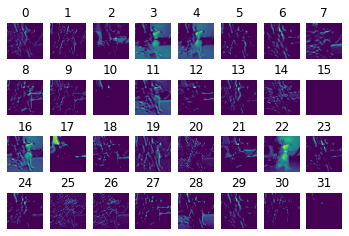

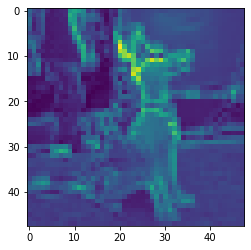

In [146]:
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 0).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(48,48,32)
print(result.shape)
from matplotlib import pyplot as plt
fig1 = result[:,:,0]
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]    
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1)
    

(1, 24, 24, 32)
(24, 24, 32)


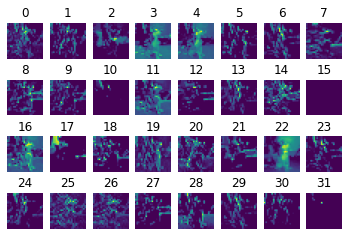

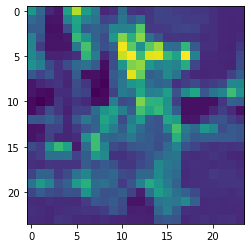

In [147]:
from keras.models import Model
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 1).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(24,24,32)
print(result.shape)
from matplotlib import pyplot as plt
fig1 = result[:,:,0]
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1)    

(1, 22, 22, 32)
(22, 22, 32)


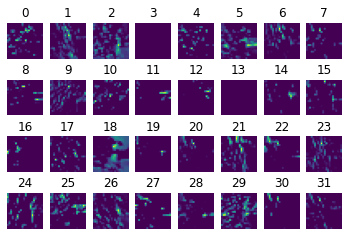

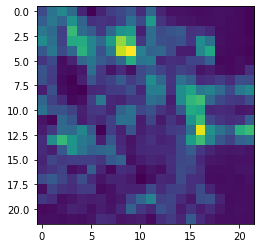

In [148]:
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 2).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(22,22,32)
print(result.shape)
fig1 = result[:,:,0]
from matplotlib import pyplot as plt
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1)

(1, 11, 11, 32)
(11, 11, 32)


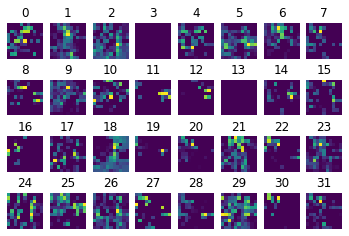

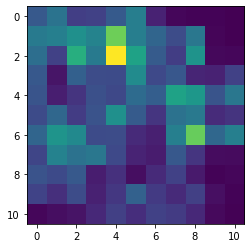

In [149]:
layer_model = Model(inputs = model.input,outputs = model.get_layer(index = 3).output)
result = layer_model.predict(pic_dog)
print(result.shape)
result = result.reshape(11,11,32)
print(result.shape)
fig1 = result[:,:,0]
from matplotlib import pyplot as plt
for i in range(32):
    fig = result[:,:,i]
    plt.subplot(4,8,(i+1))
    plt.axis('off')
    plt.imshow(fig)
    plt.title(i)
    fig1 = fig1 + result[:,:,i]
plt.show()
fig1 = fig1 - result[:,:,0]
plt.imshow(fig1)  